In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv


# Imports

In [2]:
import numpy as np # For linear algebra on matrices
import pandas as pd # For creating pandas dataframe
import seaborn as sns # For data visualization
import matplotlib.pyplot as plt # For plotting charts

# Getting Data

In [3]:
# using read_csv method to read csv file
df = pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')

# Getting One Of The Data

In [4]:
# Getting first 5 rows of the data frame
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
# Getting information about the data frome
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
# Checking if there are any null values in column
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
# Let's get basici statistical information (five number theory) about the numerical columns
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [8]:
# Name of columns
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
# Getting number of rows and cols
df.shape

(1025, 14)

In [10]:
cat_col = ['sex','cp','fbs','restecg','exang','slope','ca','thal','target']


In [11]:
num_col = df.drop(cat_col,axis=1).columns

In [12]:
num_col

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], dtype='object')

In [13]:
for col in cat_col:
    print(df[col].value_counts())

sex
1    713
0    312
Name: count, dtype: int64
cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64
fbs
0    872
1    153
Name: count, dtype: int64
restecg
1    513
0    497
2     15
Name: count, dtype: int64
exang
0    680
1    345
Name: count, dtype: int64
slope
1    482
2    469
0     74
Name: count, dtype: int64
ca
0    578
1    226
2    134
3     69
4     18
Name: count, dtype: int64
thal
2    544
3    410
1     64
0      7
Name: count, dtype: int64
target
1    526
0    499
Name: count, dtype: int64


# Data Visualization

In [14]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

## Numerical Columns

<Axes: xlabel='age', ylabel='Count'>

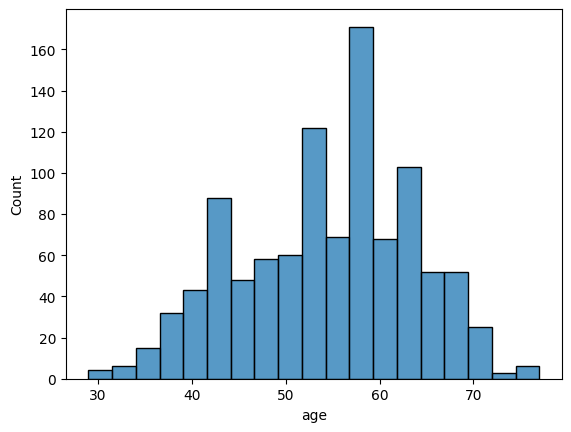

In [15]:
sns.histplot(data=df,x='age')
# You can see it is following normal distribution

<Axes: xlabel='age', ylabel='Density'>

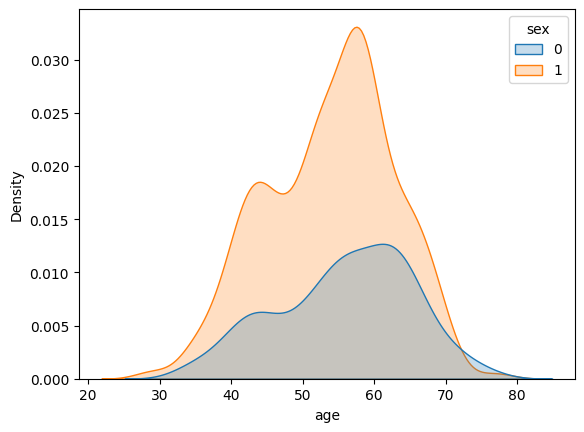

In [16]:
sns.kdeplot(data=df,x='age',fill=True,hue='sex')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


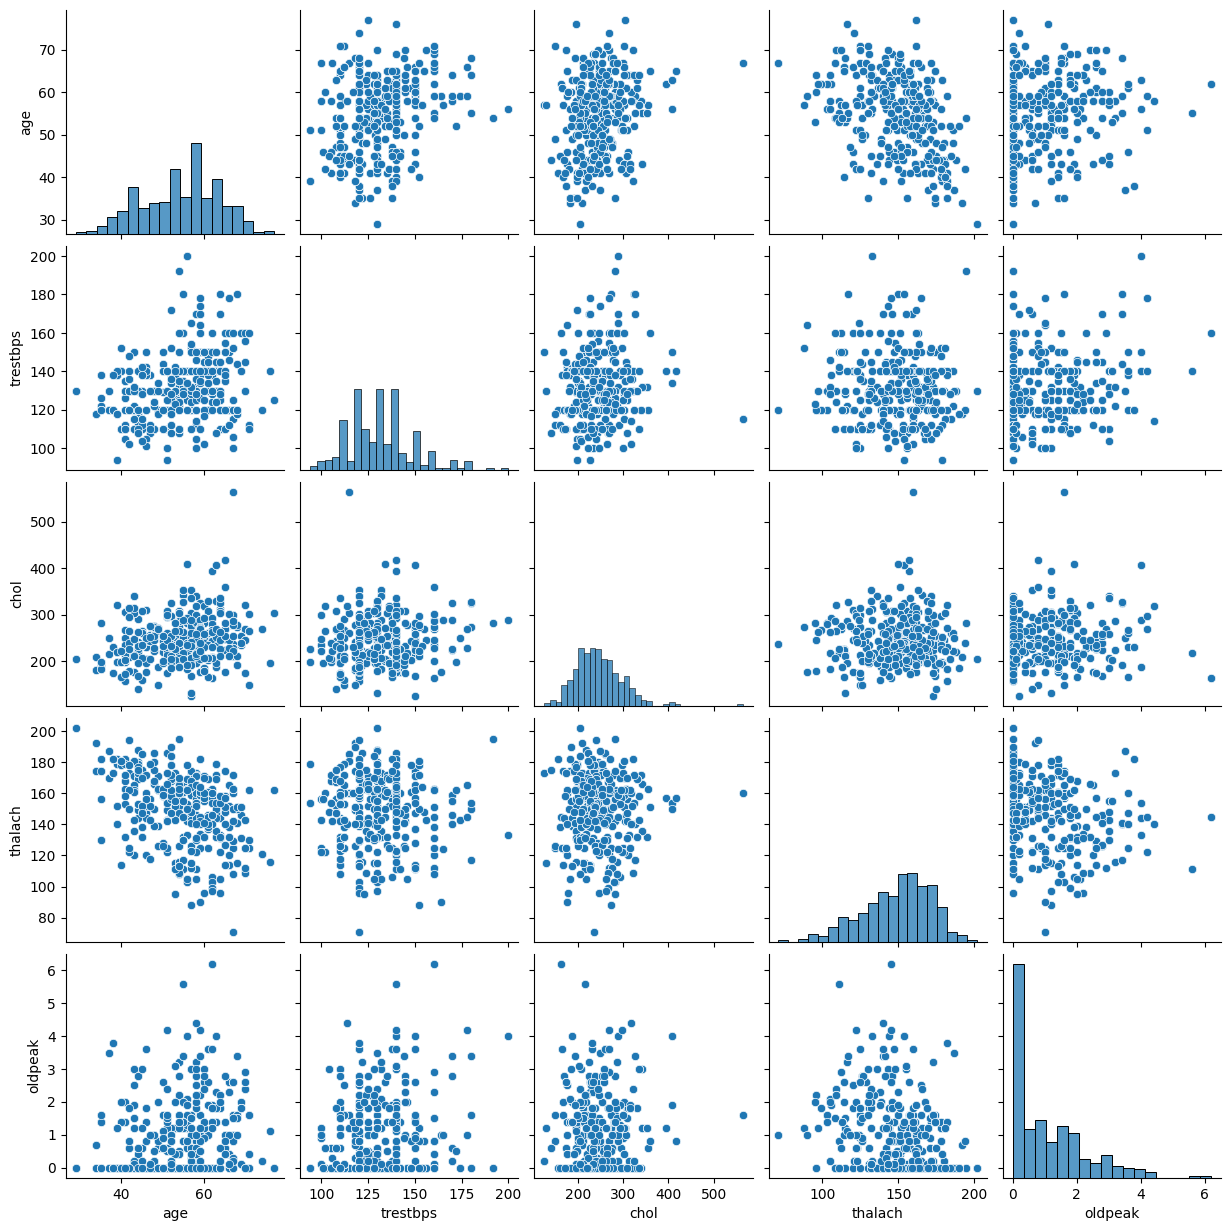

In [17]:
sns.pairplot(data=df.drop(cat_col, axis=1))

<Axes: xlabel='age', ylabel='thalach'>

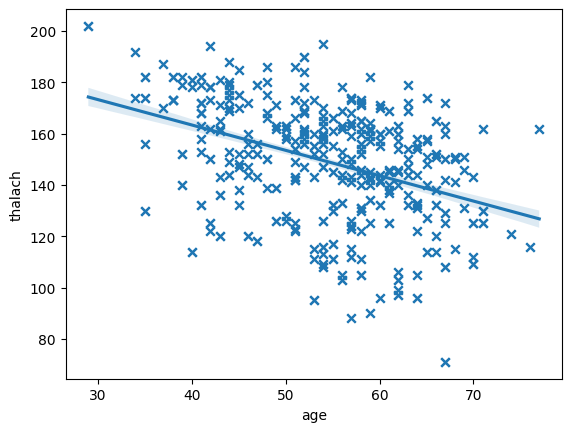

In [18]:
# let's try to plot a  regression line between age and thalach
sns.regplot(data=df,x='age',y='thalach',marker='x')

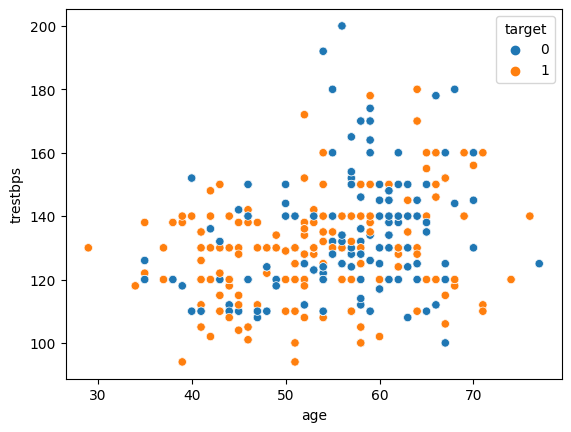

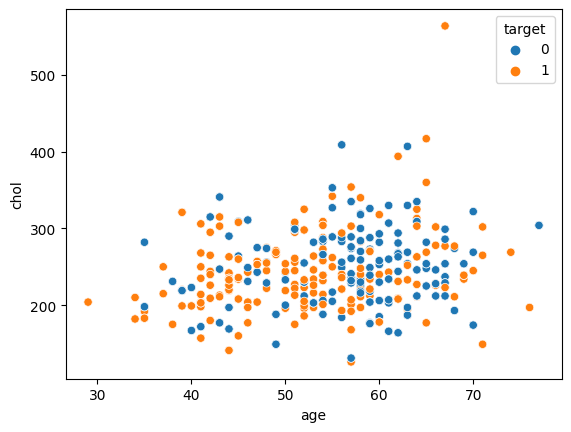

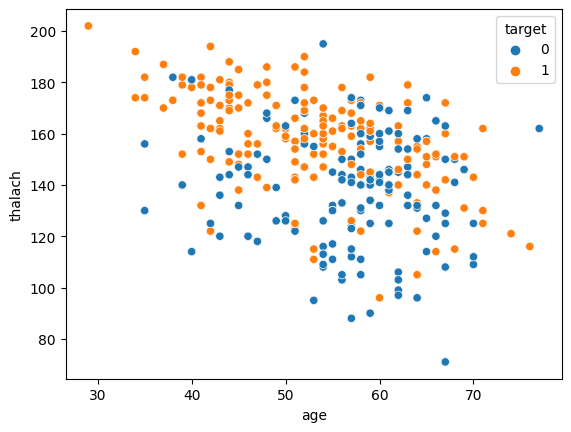

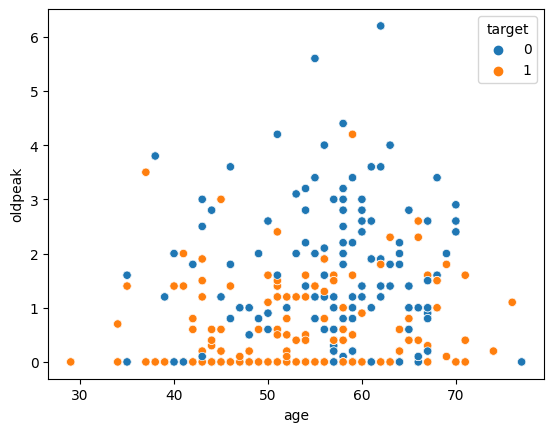

In [19]:
# let's see relation ship between numerical cols and how they are relaed to target
for col in num_col:
    if col=='age':
        continue
    sns.scatterplot(data=df,x='age',y=col,hue='target')
    plt.show()

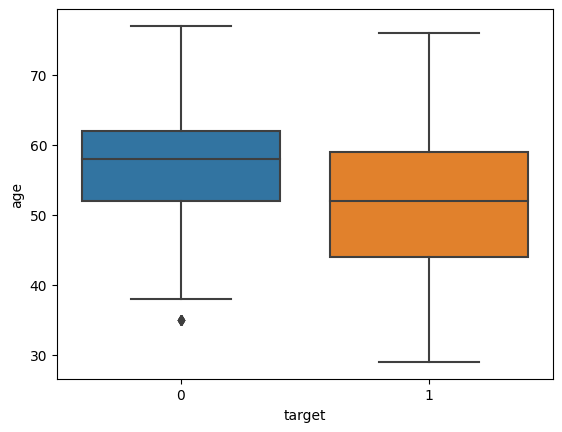

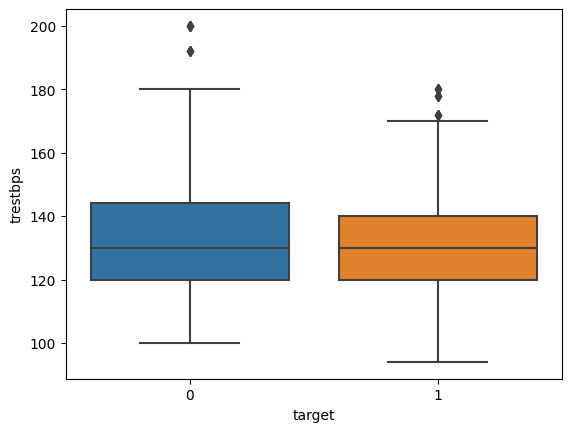

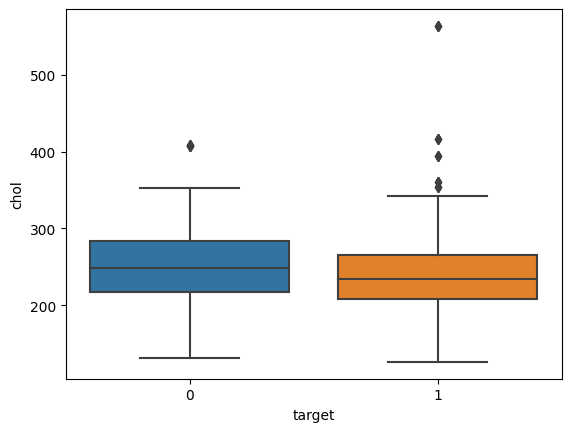

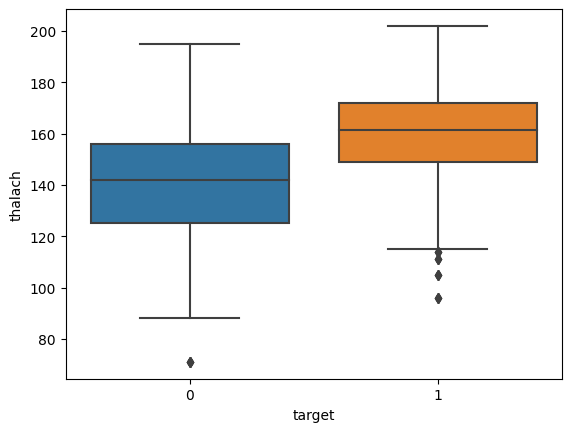

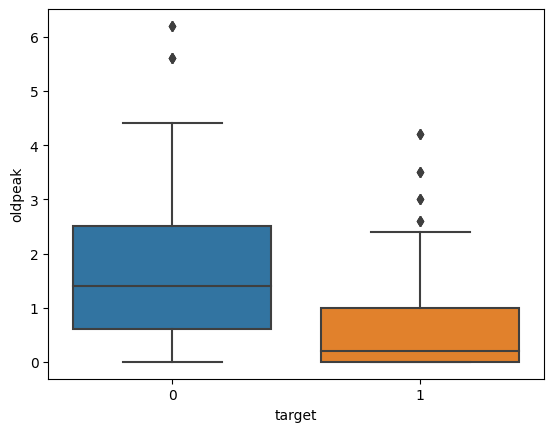

In [20]:
# Let's try to find if there are outliers present int the data
for col in num_col:
    sns.boxplot(data=df,y=col, x='target')
    plt.show()

## Categorical Columns

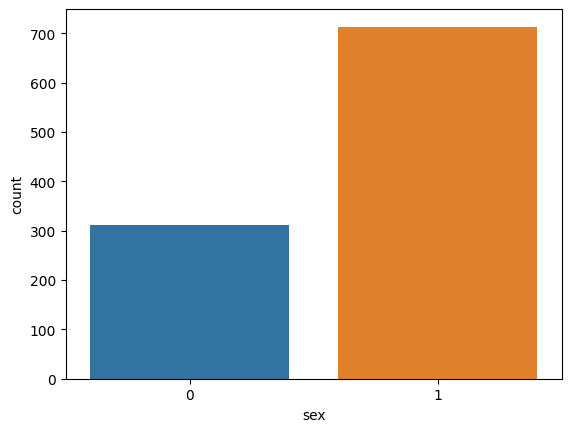

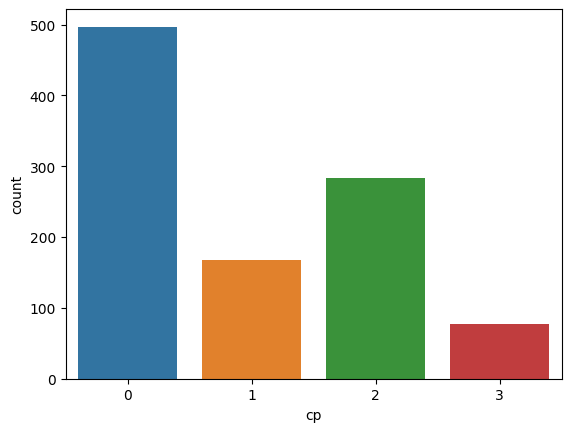

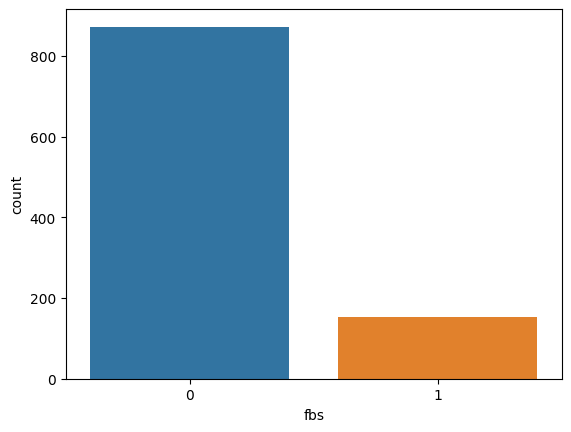

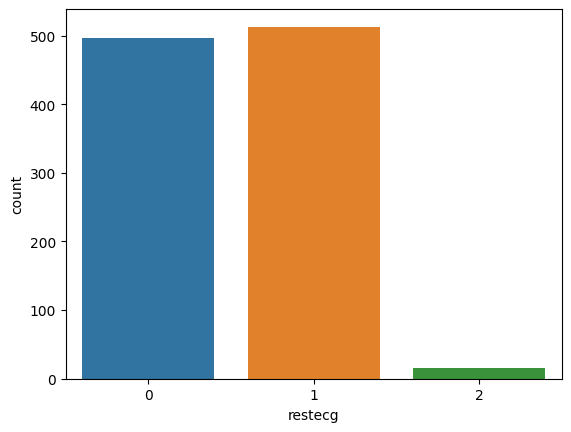

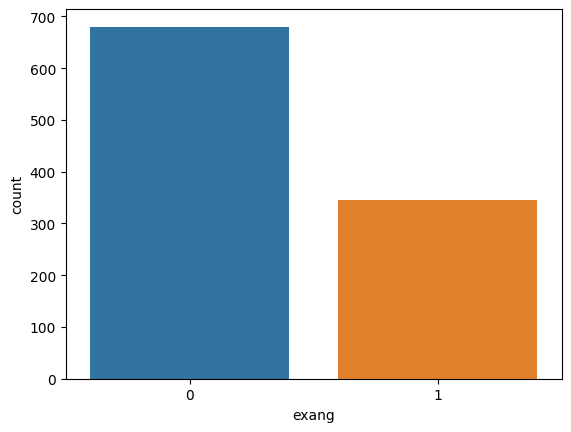

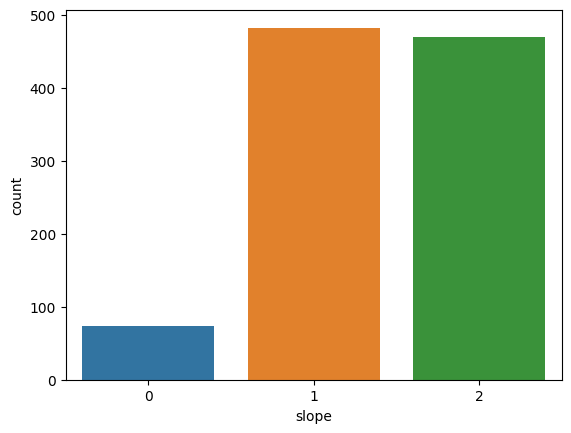

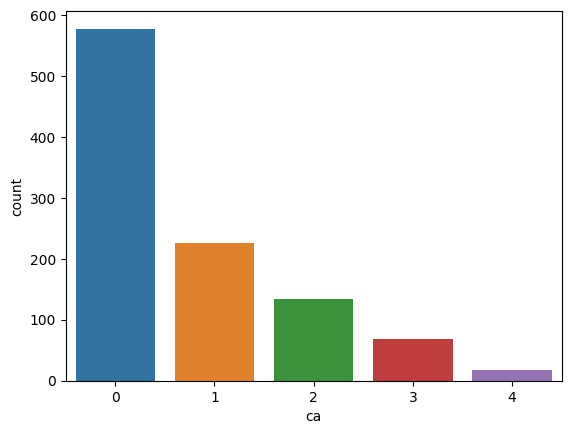

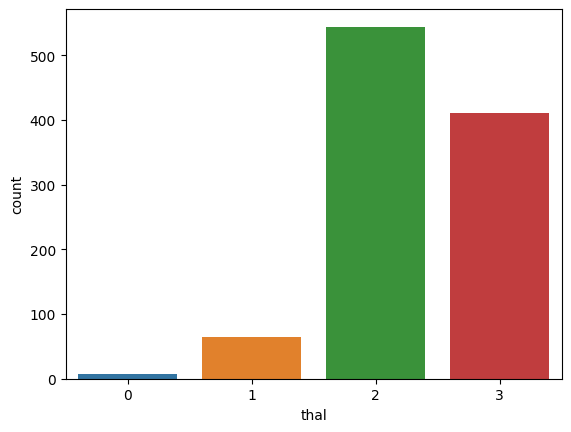

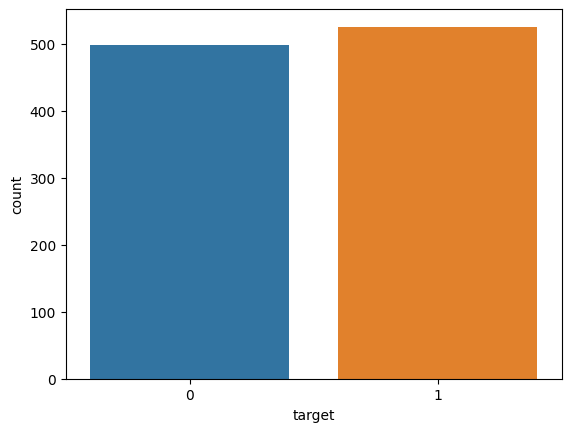

In [21]:
for col in cat_col:
    sns.countplot(data=df,x=col)
    plt.show()

# Machine Learning

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = df.drop('target',axis=1)
y = df['target']

In [24]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [25]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
X_train.shape

(820, 13)

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
model = RandomForestClassifier()

In [30]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
y_pred = model.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(y_test, y_pred)

1.0

In [34]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00       104

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
cm = confusion_matrix(y_test, y_pred)

<Axes: >

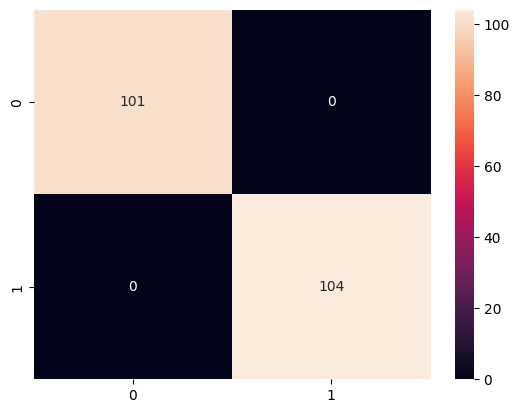

In [38]:
sns.heatmap(cm, annot=True,fmt='d')

In [39]:
pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['feature_importance']).sort_values('feature_importance', ascending=False)

,feature_importance
cp,0.145851
ca,0.120919
oldpeak,0.112238
thal,0.108422
thalach,0.104265
age,0.084075
chol,0.075874
trestbps,0.070132
exang,0.069080
slope,0.041881


In [40]:
y_prob = model.predict_proba(X_test)[:,1]

In [41]:
y_prob

array([0.99, 0.93, 0.86, 0.95, 0.92, 0.96, 0.02, 0.  , 0.15, 0.16, 0.98,
       0.95, 1.  , 1.  , 0.12, 1.  , 0.02, 0.06, 0.15, 0.  , 1.  , 1.  ,
       0.04, 0.15, 0.94, 0.94, 0.75, 0.01, 0.31, 0.06, 0.06, 1.  , 0.15,
       0.07, 0.15, 0.93, 0.97, 0.04, 0.  , 0.01, 0.96, 1.  , 0.98, 0.  ,
       0.06, 0.98, 0.22, 0.01, 0.06, 0.01, 0.98, 0.75, 0.96, 0.96, 0.94,
       0.03, 1.  , 0.94, 0.01, 0.03, 0.06, 1.  , 1.  , 0.04, 0.09, 0.  ,
       0.  , 0.96, 1.  , 0.  , 1.  , 1.  , 0.94, 0.01, 0.92, 0.01, 0.  ,
       1.  , 0.05, 0.02, 0.03, 0.88, 0.  , 0.93, 0.01, 1.  , 0.  , 0.  ,
       0.97, 0.  , 0.07, 1.  , 0.01, 0.31, 0.02, 0.96, 0.96, 0.92, 0.  ,
       0.86, 1.  , 0.  , 0.03, 0.95, 0.01, 0.01, 0.82, 0.31, 0.99, 0.01,
       0.03, 1.  , 0.01, 0.93, 0.85, 0.01, 0.05, 0.94, 0.99, 0.94, 1.  ,
       0.99, 0.16, 0.16, 1.  , 0.01, 0.98, 0.99, 0.94, 1.  , 0.85, 0.07,
       0.93, 0.96, 0.17, 0.  , 0.88, 0.  , 0.02, 0.98, 0.05, 0.07, 0.  ,
       0.88, 0.94, 0.04, 0.03, 0.11, 0.  , 0.16, 0.

In [42]:
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

In [43]:
fpr, tpr, thre = roc_curve(y_test, y_prob)

Text(0, 0.5, 'True Positive Rage')

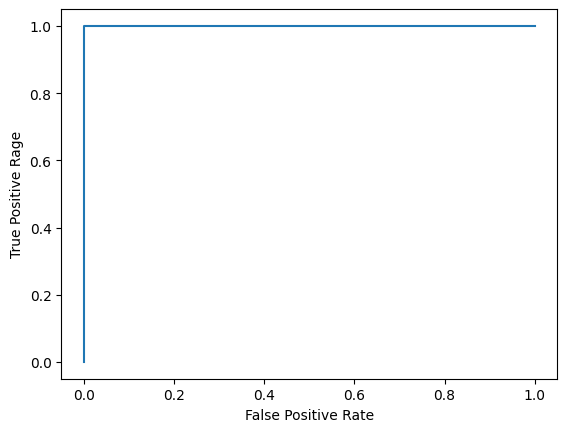

In [44]:
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rage') # Recall

In [45]:
precision, recall, thre = precision_recall_curve(y_test, y_prob)

In [46]:
precision.shape, recall.shape, thre.shape

((32,), (32,), (31,))

In [47]:
thre = np.append(thre, 1)

Text(0, 0.5, 'Precision')

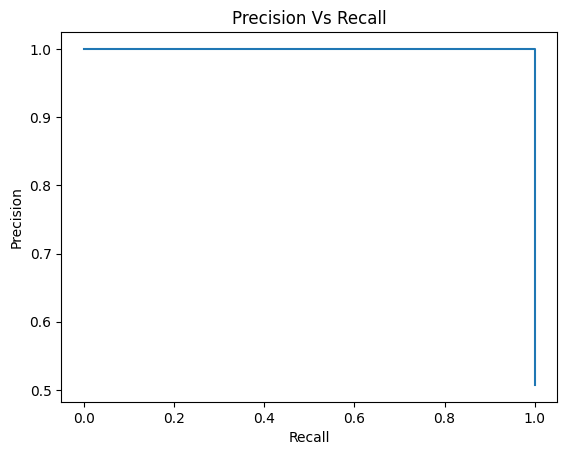

In [48]:
plt.plot(recall, precision)
plt.title('Precision Vs Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
# precsion recall trade off

Text(0.5, 1.0, 'Precision/Recall Vs. Threshold')

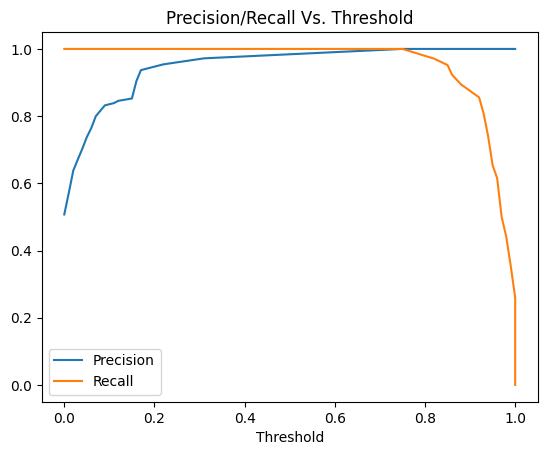

In [49]:
plt.plot(thre, precision, label='Precision')
plt.plot(thre, recall, label='Recall')
plt.legend()
plt.xlabel('Threshold')
plt.title('Precision/Recall Vs. Threshold')
# As threshold increase precisio increase and recall decrease